<a href="https://colab.research.google.com/github/MARIBELCT2015/Data_Salaries/blob/main/Salaries_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython import display

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/ds_salaries.csv")

Exploración inicial (funciones básicas)
Como un primer paso para entender la base de datos vamos a ver la cantidad de registros y visualizar los primeros datos.
Este paso es muy importante para ver que los datos se hayan cargado de forma efectiva y entender las variables con las que vamos a trabajar.
De igual forma vamos a imprimir el nombre de todas las columnas que contiene el DataFrame.

In [ ]:
print(df.shape)
df.head()

(3755, 11)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

Una de las funciones que nos aporta mayor información para empezar a entender cómo se componen nuestros datos es .info(), donde podemos ver la lista de columnas, la cantidad de valores no-nulos que tiene cada variable y el tipo de objeto o variable que identifica Pandas de forma automática.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


Cómo se ha visto en clases anteriores, la función describe() nos muestra un análisis descriptivo básico de cada columna. Si se pasa la función sin ningún parámetro vamos a tener el análsis de todas las variables numércias, pero también podemos realizar otro tipo de análisis con variables categóricas o de tipo object.

In [ ]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


Al momento de entender una base de datos es importante conocer si tenemos registros duplicados, para esto podemos usar la función .duplicated() en conjunto con la función .sum() para tener la cantidad total de registros con duplicados completos.

In [ ]:
df.duplicated().sum()

1171

La misma función la podemos usar con un subset, especificando la o las columnas donde vamos a revisar duplicados, para algunas variables nos puede interesar que no tengamos duplicados (por ejemplo la columna del ID si la vamos a usar como una llave) y otras variables donde si podríamos encontrar duplicados (por ejemplo es de esperar que un director haya producido más de una película).

In [ ]:
print(df.duplicated(subset="employment_type").sum())
print(df.duplicated(subset="job_title").sum())

3751
3662


También podemos encontrar la cantidad de registros únicos, es decir un "conteo distinto" o una agrupación por los valores diferentes que vamos a tener.

In [ ]:
df["job_title"].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

Esta misma tabla de valores únicos la vamos a tener en el índice de una tabla de frecuencias producida por un .value_counts(), pero el orden va a estar delimitado por la frecuencia de registros.

In [ ]:
df["job_title"].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

Para obtener el número de registos nulos en todas las columnas podemos usar la función .isnull() junto con la función .sum(). esto nos va a mostrar la cantidad de datos nulos en cada columna. Es importante tener en cuenta que los datos nulos no son los datos que están errados necesariamente. puede haber datos errados con algún valor o dependiendo de la temática es posible que un datos nulo si esté justificado... en otras palabras tenemos que aprender a trabajar con los nulos.

In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [ ]:
df["work_year"].value_counts()

2023    1785
2022    1664
2021     230
2020      76
Name: work_year, dtype: int64

In [ ]:
df["experience_level"].value_counts()

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [ ]:
df["company_location"].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [ ]:
df["employment_type"].value_counts()

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [ ]:
df["job_title"].value_counts()

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [ ]:
df["salary"].value_counts()

100000    112
150000    100
120000     99
160000     85
130000     85
         ... 
241871      1
93919       1
385000      1
225900      1
412000      1
Name: salary, Length: 815, dtype: int64

In [ ]:
df["salary_currency"].value_counts()

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

In [ ]:
df["salary_in_usd"].value_counts()

100000    99
150000    98
120000    91
160000    84
130000    82
          ..
234100     1
223800     1
172100     1
232200     1
94665      1
Name: salary_in_usd, Length: 1035, dtype: int64

In [ ]:
df["employee_residence"].value_counts()

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [ ]:
df["company_location"].value_counts()

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [ ]:
df["company_size"].value_counts()

M    3153
L     454
S     148
Name: company_size, dtype: int64

In [ ]:
###df_tv = df[df["experience_level"] == "TV Show"]
print(df_tv.shape)
df_tv.tail(2)

Dentro de la base de datos vemos que hay una columna con la que no vamos a trabajar que es la descripcion (tal vez en un futuro si trabajamos con lenguaje natural la usaremos, pero por ahora no), por esto la vamos a eliminar.

In [ ]:
df.drop("remote_ratio", axis=1, inplace=True)

Por otra parte, podemos hacer operaciones sobre el total de una columna, operaciones como conteos, sumas, promedios, modas, incluso operaciones más complejas por medio de un .apply() junto con lambda.

In [ ]:
df["salary_in_usd"].sum()

516576814

In [ ]:
df["salary_in_usd"].mean()

137570.38988015978

In [ ]:
df["salary_in_usd"].mode()

0    100000
Name: salary_in_usd, dtype: int64

In [ ]:
df["salary_in_usd"].median()

135000.0

Exploración inicial (gráficos simples)

[Text(0.5, 1.0, 'Nivel de experiencia')]

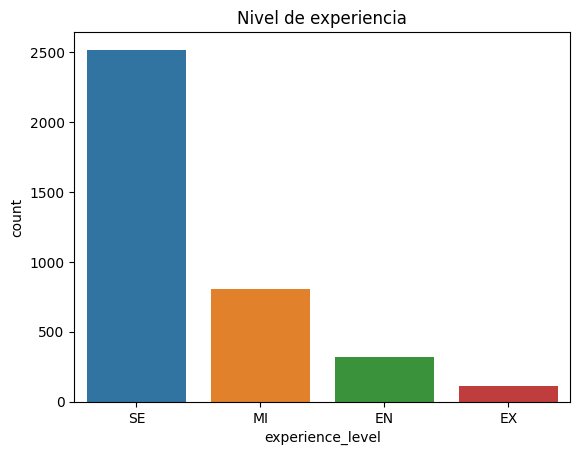

In [ ]:
sns.countplot(df, x="experience_level").set(title="Nivel de experiencia")

In [ ]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'company_location', 'company_size'],
      dtype='object')

[Text(0.5, 1.0, 'Año')]

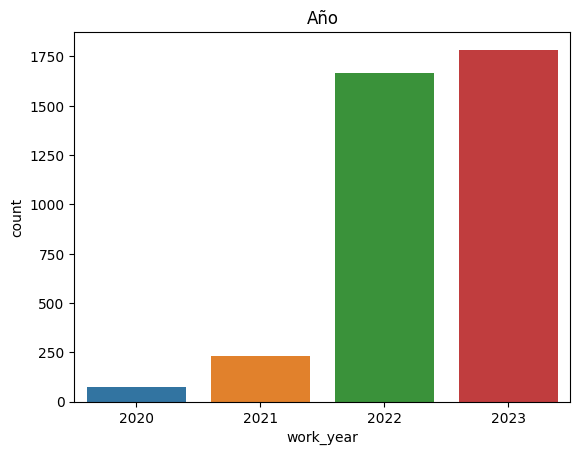

In [ ]:
sns.countplot(df, x="work_year").set(title="Año")

[Text(0.5, 1.0, 'Salario')]

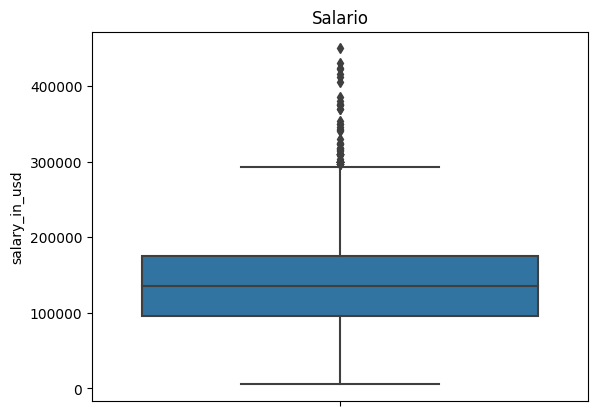

In [ ]:
sns.boxplot(df, y="salary_in_usd").set(title="Salario en dólares")

In [ ]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('df')

# plot
sns.violinplot(x=df["salary_in_usd"], y=df["Salario en dólares"])

[Text(0.5, 1.0, 'Tamaño de la Empresa')]

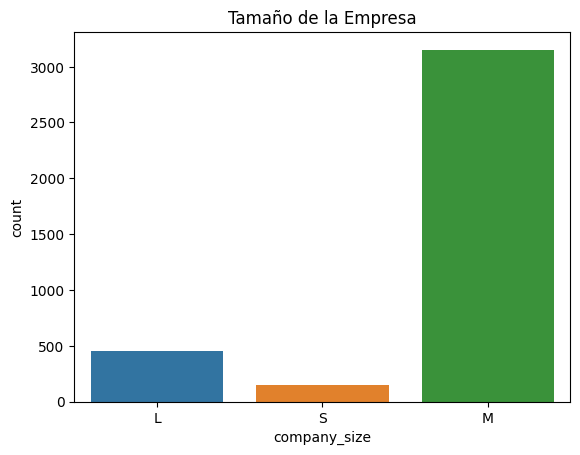

In [ ]:
sns.countplot(df, x="company_size").set(title="Tamaño de la Empresa")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB
